#  RBM Analysis

Example of the distribution of initial and final Free Energies for a vanilla RBM


In [1]:
import numpy as np
import h5py

import matplotlib
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline 

from sklearn import linear_model, datasets, metrics, preprocessing 
from sklearn.cross_validation import train_test_split
from sklearn.metrics import accuracy_score

/Users/charlesmartin14/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
from sklearn.datasets import load_digits
from sklearn.utils.validation import assert_all_finite
from scipy.sparse import csc_matrix, csr_matrix, lil_matrix
from sklearn.utils.testing import (assert_almost_equal, assert_array_equal,
                                   assert_true)


from sklearn.preprocessing import Binarizer
np.seterr(all='warn')

Xdigits = load_digits().data
Xdigits -= Xdigits.min()
Xdigits /= Xdigits.max()

b = Binarizer(threshold=0.001, copy=True)
Xdigits = b.fit_transform(Xdigits)
print Xdigits.shape

(1797, 64)


## Anaylsis of RBM stochastic properties

### We see the variations are difficult to unit test, and, really, to compare 

- variations in norms of W, hb, vb, FE, samples, etc
- study per epoch, and after N epochs


In [3]:
from sklearn.neural_network import BernoulliRBM
X = Xdigits.copy()


In [6]:
def one_epoch_Brbm(X):
    rbm1 = BernoulliRBM(n_components=64, batch_size=20,
                  learning_rate=0.005, verbose=False, n_iter=1)
    rbm1.fit(X);
    return rbm1

ws1, vbs1, hbs1, scores1 = [], [], [], []
for i in range(10000):
    rbm1 = one_epoch_Brbm(X)
    ws1.append(np.linalg.norm(rbm1.components_,ord=2))
    vbs1.append(np.linalg.norm(rbm1.intercept_visible_,ord=2))
    hbs1.append(np.linalg.norm(rbm1.intercept_hidden_,ord=2))
    scores1.append(np.average(rbm1.score_samples(X)))
    if (i%100 == 0):
        print i,

0 100 200 300 400 500 600 700 800 900 1000 1100 1200 1300 1400 1500 1600 1700 1800 1900 2000 2100 2200 2300 2400 2500 2600 2700 2800 2900 3000 3100 3200 3300 3400 3500 3600 3700 3800 3900 4000 4100 4200 4300 4400 4500 4600 4700 4800 4900 5000 5100 5200 5300 5400 5500 5600 5700 5800 5900 6000 6100 6200 6300 6400 6500 6600 6700 6800 6900 7000 7100 7200 7300 7400 7500 7600 7700 7800 7900 8000 8100 8200 8300 8400 8500 8600 8700 8800 8900 9000 9100 9200 9300 9400 9500 9600 9700 9800 9900


In [7]:
def twenty_epochs_Brbm(X):
    rbm20 = BernoulliRBM(n_components=64, batch_size=20,
                  learning_rate=0.005, verbose=False, n_iter=20)
    rbm20.fit(X);
    return rbm20

ws20, vbs20, hbs20, scores20 = [], [], [], []
X = Xdigits.copy()

for i in range(10000):
    rbm20 = twenty_epochs_Brbm(X)
    ws20.append(np.linalg.norm(rbm20.components_,ord=2))
    vbs20.append(np.linalg.norm(rbm20.intercept_visible_,ord=2))
    hbs20.append(np.linalg.norm(rbm20.intercept_hidden_,ord=2))
    scores20.append(np.average(rbm20.score_samples(X)))
    if (i%100 == 0):
        print i,

0 100 200 300 400 500 600 700 800 900 1000 1100 1200 1300 1400 1500 1600 1700 1800 1900 2000 2100 2200 2300 2400 2500 2600 2700 2800 2900 3000 3100 3200 3300 3400 3500 3600 3700 3800 3900 4000 4100 4200 4300 4400 4500 4600 4700 4800 4900 5000 5100 5200 5300 5400 5500 5600 5700 5800 5900 6000 6100 6200 6300 6400 6500 6600 6700 6800 6900 7000 7100 7200 7300 7400 7500 7600 7700 7800 7900 8000 8100 8200 8300 8400 8500 8600 8700 8800 8900 9000 9100 9200 9300 9400 9500 9600 9700 9800 9900


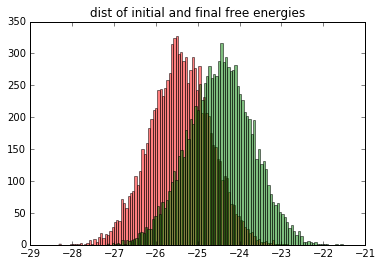

In [8]:
plt.hist(scores1,100, color='r', alpha = 0.5);
plt.hist(scores20,100, color='g', alpha = 0.5);


plt.title("dist of initial and final free energies")

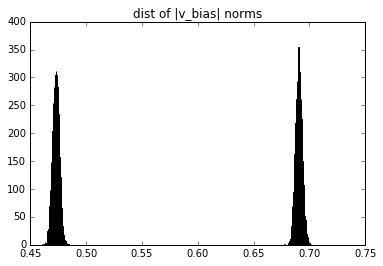

In [9]:
plt.hist(vbs1,100, color='red');
plt.hist(vbs20,100, color='green');

plt.title("dist of |v_bias| norms")

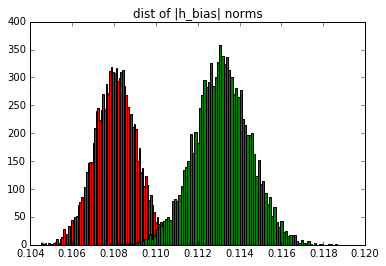

In [10]:
plt.hist(hbs1,100, color='red');
plt.hist(hbs20,100, color='green');

plt.title("dist of |h_bias| norms")

## What is the best fit for the free energies ?

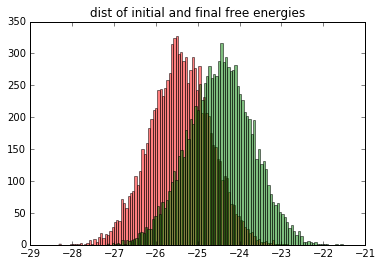

In [12]:
plt.hist(scores1,100, color='r', alpha = 0.5);
plt.hist(scores20,100, color='g', alpha = 0.5);


plt.title("dist of initial and final free energies");


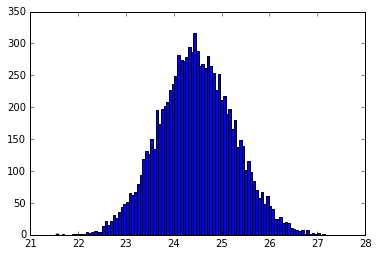

In [83]:
from sklearn.neighbors.kde import KernelDensity
from scipy.stats import norm
X = np.array(scores20)[:, None]
X_plot = np.linspace(-21, -29, X.shape[0])[:, None]

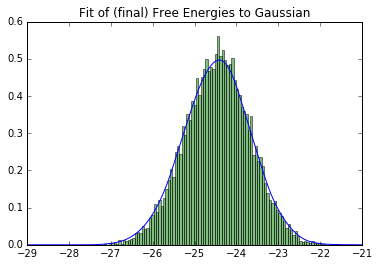

In [88]:
kde = KernelDensity(kernel='gaussian', bandwidth=0.2).fit(X)
log_dens = kde.score_samples(X_plot)
plt.plot(X_plot[:, 0], np.exp(log_dens), '-')

plt.title('Fit of (final) Free Energies to Gaussian')
plt.hist(scores20,bins=100, normed=True, alpha=0.5)
plt.show()